<a href="https://colab.research.google.com/github/jagatabhay/TSAI/blob/master/S12/TinyImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget cq http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2020-06-28 13:24:27--  http://cq/
Resolving cq (cq)... failed: Name or service not known.
wget: unable to resolve host address ‘cq’
--2020-06-28 13:24:27--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  19.8MB/s    in 15s     

2020-06-28 13:24:42 (15.9 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]

FINISHED --2020-06-28 13:24:42--
Total wall clock time: 15s
Downloaded: 1 files, 237M in 15s (15.9 MB/s)


In [2]:
!git clone https://github.com/jagatabhay/TSAI.git

Cloning into 'TSAI'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 643 (delta 58), reused 0 (delta 0), pack-reused 541
Receiving objects: 100% (643/643), 5.85 MiB | 4.20 MiB/s, done.
Resolving deltas: 100% (353/353), done.


In [3]:
from TSAI.S12 import zipdatasets , resnet  , albumentationstransform , datasetloader 
model , device = resnet.resnet18(num_classes = 200)
trainloader , testloader = datasetloader.datasetloader(albumentationstransform.train_transforms() , 
                                                       batchsize = 256 ,
                                                       numwork  = 4)

------------- INFO : Preparing Train and Test Loader Folder ---------------- 
Train Data Transfer successfully
Val Data Transfer successfully
------------- INFO : Train and Test Loader Folder TinyImageNet Done ---------------- 
Device Load :  cuda
Class Loaded Successfully 
----------- INFO : REQUIRED albumentations LIBRARIES LOADED... -----------
-------- InFo : ResNet18 Model Activated -----------
---------- INFO : DataSet Loader Activated ----------
 ---------------- INFO : Trainloader and Testloader Done--------------------------- 


In [ ]:
import torch

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001 , momentum = 0.9 )

 LR Scheduler Loaded Successfully 



Learning rate search finished. See the graph with {finder_name}.plot()


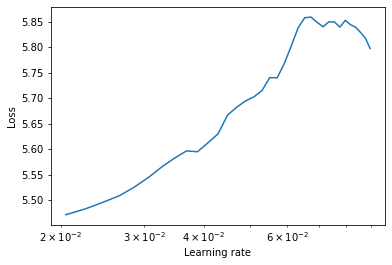

In [ ]:
from TSAI.S12 import LRScheduler
lrfinder = LRScheduler.LRFinder(model, optimizer , criterion , device = "cuda")
lrfinder.range_test(trainloader , end_lr =  0.1 , num_iter = 50 , step_mode = "linear" )
lrfinder.plot()

In [4]:
import torch

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001 , momentum = 0.9 , weight_decay = 0.0001  )
scheduler = torch.optim.lr_scheduler.OneCycleLR( optimizer , max_lr = 0.01 , div_factor = 10 , pct_start  = 5/24 ,
                                                 cycle_momentum = True , epochs = 30 , steps_per_epoch = len(trainloader),
                                                 final_div_factor = 100 , anneal_strategy = 'linear' )

In [5]:
from TSAI.S12 import traindataset , testdataset
traindataset.traindataset(range_ = 10 , model = model , device = device , trainloader = trainloader , 
                                        optimizer = optimizer , criterion_ = criterion , batchsize = 256 , 
                                        scheduler_ = scheduler)

[1,   390] loss: 3.781
[2,   390] loss: 2.918
[3,   390] loss: 2.415
[4,   390] loss: 2.077
[5,   390] loss: 1.822
[6,   390] loss: 1.605
[7,   390] loss: 1.431
[8,   390] loss: 1.269
[9,   390] loss: 1.124
[10,   390] loss: 1.007
INFO : Finished Training of Dataset for one epoch


In [6]:
testdataset.testdataset(model = model , device = device , testloader = testloader )

Accuracy of the Network on the 10000 test images: 46 %


In [7]:
traindataset.traindataset(range_ = 10 , model = model , device = device , trainloader = trainloader , 
                                        optimizer = optimizer , criterion_ = criterion , batchsize = 256 , 
                                        scheduler_ = scheduler)

[1,   390] loss: 0.889
[2,   390] loss: 0.793
[3,   390] loss: 0.698
[4,   390] loss: 0.610
[5,   390] loss: 0.522
[6,   390] loss: 0.441
[7,   390] loss: 0.359
[8,   390] loss: 0.287
[9,   390] loss: 0.211
[10,   390] loss: 0.127
INFO : Finished Training of Dataset for one epoch


In [8]:
testdataset.testdataset(model = model , device = device , testloader = testloader )

Accuracy of the Network on the 10000 test images: 53 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


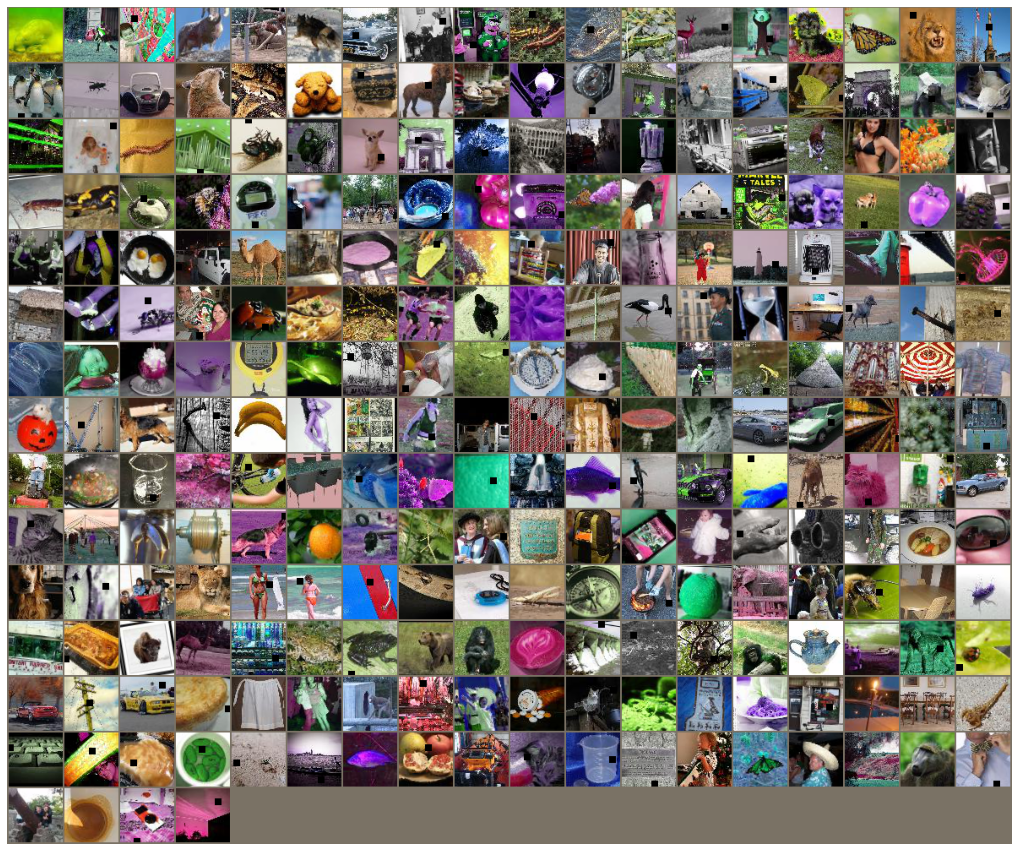

In [9]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def imshow(image):
  if isinstance(image , torch.Tensor):
    image = image.numpy().transpose(( 1, 2, 0 ))
  else:
    image = np.array(image).transpose((1 , 2, 0 ))

  #UnNormalize
  mean = np.array([0.4802, 0.4481, 0.3975])
  std = np.array([(0.2302, 0.2265, 0.2262)])
  image = std*image + mean
  
  #plot
  fig , ax = plt.subplots(1 , 1 , figsize = (18,18) )
  plt.imshow(image)
  ax.axis('off')


images , _ = next(iter(trainloader))
out = torchvision.utils.make_grid(images , nrow = 18 )
imshow(out) 